In [6]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np


In [7]:
instance_image = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/gt_instance_image/0000.png')
actual_image = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/image/0000.png')
binary_mask = cv2.imread('/home/kugos/Work/Nayan/lanenet-lane-detection/data/training_data_example/gt_binary_image/0000.png')

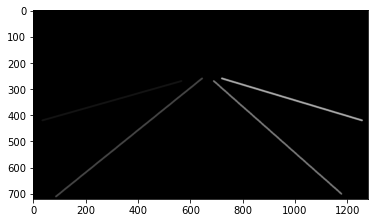

In [8]:
plt.imshow(instance_image)

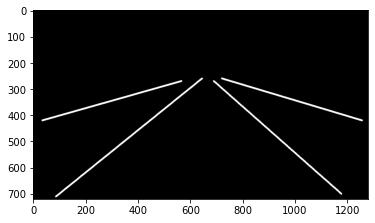

In [9]:
plt.imshow(binary_mask)

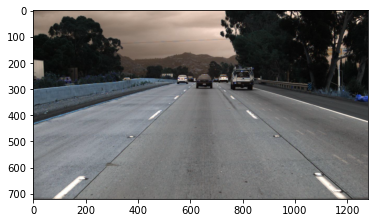

In [10]:
plt.imshow(actual_image)

In [11]:
binary_mask.shape

(720, 1280, 3)

In [12]:
np.unique(binary_mask[:,:])

array([  0, 255], dtype=uint8)

# Viewing json

In [13]:
import json

In [14]:
d_json = json.loads(open('/home/kugos/Work/Nayan/Lane_change/All_lane_json/7-17.json').read())

In [15]:
d_json[0]

{'id': 5470227,
 'image_url': 'https://storage.googleapis.com/nayan_training_data/Himanshu/lane_annotation_static/Set_2/lane_annotation_static/541229_frame124.jpg',
 'video_id': '541229',
 'question': 'Draw all lanes and lane boundaries',
 'filename': '541229_frame124.jpg',
 'data_set_id': 31874,
 'source_image_url': '',
 'predicted_template_url': 'http://49.205.180.243/template_icon/lanes_example.gif',
 'wf_step_position': 1,
 'bounding_boxes': None,
 'raw_overlay_data': '',
 'confidence_score': 0,
 'complete': True,
 'judgement': {'answer': '[{"judgementPoints":[],"points":[[631.7001,80.25902],[600.0481,153.85754],[638.0305,200.81407]],"template":"","templateName":"","type":"LINE"},{"judgementPoints":[],"points":[[612.37573,347.34506],[435.79083,204.81036],[474.43964,128.21463]],"template":"","templateName":"","type":"LINE"},{"judgementPoints":[],"points":[[457.78064,344.68088],[292.52383,216.79927],[346.16565,93.91304]],"template":"","templateName":"","type":"LINE"},{"judgementPoint

In [16]:
sample_json = d_json[1]

In [17]:
eval(sample_json['judgement']['answer'])[0]

{'judgementPoints': [],
 'points': [[628.70154, 244.77335],
  [566.39703, 189.4912],
  [614.3748, 74.26457]],
 'template': '',
 'templateName': '',
 'type': 'LINE'}

In [18]:
import requests
def save_image(image_url, set_path, filename):
    '''
    This Function is to download and save the image from the given URL
    
    Parameters
    -----------
    'image_url': str
        URL for the image to be downloaded
    
    'set_path': str
        Dir path to save the downloaded image
    
    'filename': str
        Filename that need to be used while saving the image
    '''

    r3 = requests.get(image_url,verify = False)
    image_path = os.path.join(set_path, filename)
    with open(image_path,'wb') as f2: 
        f2.write(r3.content)
    return image_path
def get_bezier_points(points):

    """
    Points are in the form of 1st 2nd and 3rd where 1st is the starting point, 
    3rd is the ending point and 2nd is the control point
    """
    length = len(points)
    no_lines = math.floor(length/2)
    # print(no_lines)
    d_total = np.zeros([1,2])
    for i in range(no_lines):
        if i == 1:
            start_point = list(points[0])
            control_point = points[1]
            end_point = list(points[2])
        if i == 2:
            start_point = list(points[2])
            control_point = points[3]
            end_point = list(points[4])
        elif i == 3:
            start_point = list(points[4])
            control_point = points[5]
            end_point = list(points[6])
        elif i == 4:
            start_point = list(points[6])
            control_point = points[7]
            end_point = list(points[8])   
        elif i == 5:
            start_point = list(points[8])
            control_point = points[9]
            end_point = list(points[10])
        elif i == 6:
            start_point = list(points[10])
            control_point = points[11]
            end_point = list(points[12])
        elif i == 7:
            start_point = list(points[12])
            control_point = points[13]
            end_point = list(points[14])
        elif i == 8:
            start_point = list(points[14])
            control_point = points[15]
            end_point = list(points[16])
        else:
            start_point = list(points[0])
            control_point = points[1]
            end_point = list(points[2])                
        intermediate_points = []
        t=0.1
        intermediate_points.append(start_point)
        while t < 1:
            x = math.pow((1-t), 2)*start_point[0] + 2*t*(1-t) * \
                control_point[0] + math.pow(t, 2)*end_point[0]
            y = math.pow((1-t), 2)*start_point[1] + 2*t*(1-t) * \
                control_point[1] + math.pow(t, 2)*end_point[1]
            intermediate_points.append([int(x), int(y)])
            t += 0.1
        intermediate_points.append(end_point)
        d = np.array(intermediate_points)
        d_total = np.concatenate((d_total, d))
    #output = cv2.polylines(image, np.int32([d]), isClosed=False, color=(0,255,255), thickness=10)
    d_total = d_total[1:][:]
    print("d_total: ", d_total)
    return d_total

In [19]:
save_image(sample_json['image_url'], './', 'sample_3819.jpg')

'./sample_3819.jpg'

In [20]:
lanes = eval(sample_json['judgement']['answer'])

In [21]:
image_path = './sample_3819.jpg'
image = cv2.imread(image_path)
height, width = image.shape[:2]
            
blank_image = np.zeros((height,width))

In [22]:
len(lanes)

12

In [23]:
import math
from random import randint
for lane in lanes:
    lane_points = [(int(x*width),int(y*height)) if x<1 and y<1 else (int(x),int(y))  for x,y in lane['points']]
    # print("lane_points: ", lane_points)
    new_lane_points = get_bezier_points(lane_points)
    # print("new_lane_points: ", new_lane_points)
    cv2.polylines(blank_image, [np.int32(new_lane_points)],False,(randint(0,255)),10)
    # break


d_total:  [[628. 244.]
 [616. 232.]
 [607. 219.]
 [600. 205.]
 [596. 190.]
 [593. 174.]
 [593. 156.]
 [595. 137.]
 [599. 117.]
 [605.  96.]
 [614.  74.]
 [614.  74.]]
d_total:  [[561. 340.]
 [531. 316.]
 [507. 292.]
 [486. 269.]
 [469. 246.]
 [457. 223.]
 [449. 200.]
 [445. 177.]
 [445. 154.]
 [450. 132.]
 [459. 110.]
 [459. 110.]]
d_total:  [[318. 124.]
 [312. 142.]
 [309. 162.]
 [309. 182.]
 [313. 202.]
 [320. 223.]
 [330. 244.]
 [343. 266.]
 [360. 289.]
 [380. 312.]
 [402. 336.]
 [403. 336.]]
d_total:  [[194. 115.]
 [183. 128.]
 [176. 143.]
 [172. 159.]
 [171. 177.]
 [173. 195.]
 [178. 214.]
 [187. 234.]
 [199. 256.]
 [213. 278.]
 [231. 302.]
 [232. 302.]]
d_total:  [[112. 342.]
 [ 91. 324.]
 [ 73. 306.]
 [ 58. 287.]
 [ 47. 267.]
 [ 38. 246.]
 [ 32. 225.]
 [ 29. 202.]
 [ 29. 179.]
 [ 32. 155.]
 [ 38. 131.]
 [ 39. 131.]]
d_total:  [[506.   6.]
 [501.  17.]
 [496.  28.]
 [491.  39.]
 [486.  50.]
 [481.  61.]
 [476.  72.]
 [471.  83.]
 [466.  94.]
 [461. 105.]
 [456. 116.]
 [456. 117.]

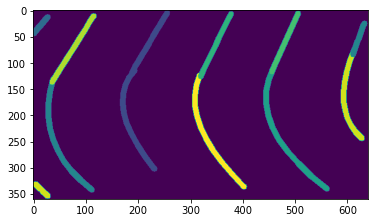

In [24]:
plt.imshow(blank_image)

In [25]:
cv2.imwrite("blank_image.jpg", blank_image)

True

In [27]:
from sklearn.cluster import DBSCAN

In [31]:
input_image_nonzero = blank_image.nonzero()
input_image_nonzero_array = np.array([input_image_nonzero[1], input_image_nonzero[0]])
input_array = input_image_nonzero_array.transpose()

In [32]:
dbscan_label = DBSCAN(eps=10, min_samples=5).fit_predict(input_array)


In [33]:
dbscan_label

array([0, 0, 0, ..., 6, 6, 6])

In [35]:
dbscan_label.shape

(20249,)

In [37]:
half = blank_image

total_frame = np.concatenate((input_array, np.expand_dims(dbscan_label, axis=-1)), axis = -1)
new_frame = np.zeros(half.shape, np.uint8)
for i, j, l in total_frame:
    new_frame[j][i] = l

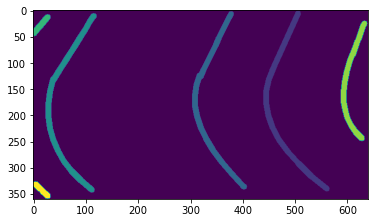

In [38]:
plt.imshow(new_frame)

In [39]:
dbscan_label

array([0, 0, 0, ..., 6, 6, 6])